In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import markovgen

IPythonConsole.drawOptions.drawMolsSameScale=False

# EITHER: Load a preexisting state
to not spend time on loading molecules and counting weights. importing the 100K chembl weights should take about 10 sec

In [2]:
mg = markovgen.Generator(max_n=1000,verbose=True)
mg.load_state("data/weights_chembl10K_groupselfies_depth7.pkl.xz")

In [ ]:
mg.

# OR: Load+analyze 100K ChEMBL molecules to create new weights
This will take 10 minutes or so. you can set max_n to 1000 to make it work in ~10 seconds (and using only 1000 cmpds as training). There are 4 modes: SMILES, DeepSMILES, selfies and groupselfies. the latter performs best. 

In [3]:
mg = markovgen.Generator(max_n=10000,depth=7,verbose=True,mode="groupselfies")
#mg.load('data/chembl100K.csv.xz') #can be a regular csv too
mg.load('../data/input_data/input_gener_glucocor_dis_4.csv')
mg.populate_matrix()

save state for later usage. these files can get large, for depth 7, mode groupselfies, 100K cmpds the size of the file is 17.5 MB. it also takes a minute or so to do this because the files get gzipped

In [4]:
mg.save_state("data/weights_chembl10K_groupselfies_depth7.pkl.xz")

# Generate a single molecule without filter
to see some common errors

In [55]:
m1=mg.gen_mol()[0]
display(m1)
prob,reason=markovgen.filter_problematic_frags(m1)
if prob==True:
    print("this molecule was rejected because of",reason)
else:
    print("this molecule passed the filter")

None

this molecule was rejected because of the input mol being None


# Generate 50 filtered molecules

amount of strings parsed is: 1802
efficiency is 0.5549389567147613
duplicate rate of filt compounds is 0.0
rate of uniques is 0.02
generation took 5.15 s, thats 0.2577301263809204 sec per unique molecule after filtering
total amount of trys was 56087. this means a validity of 3.2128657264606773 %


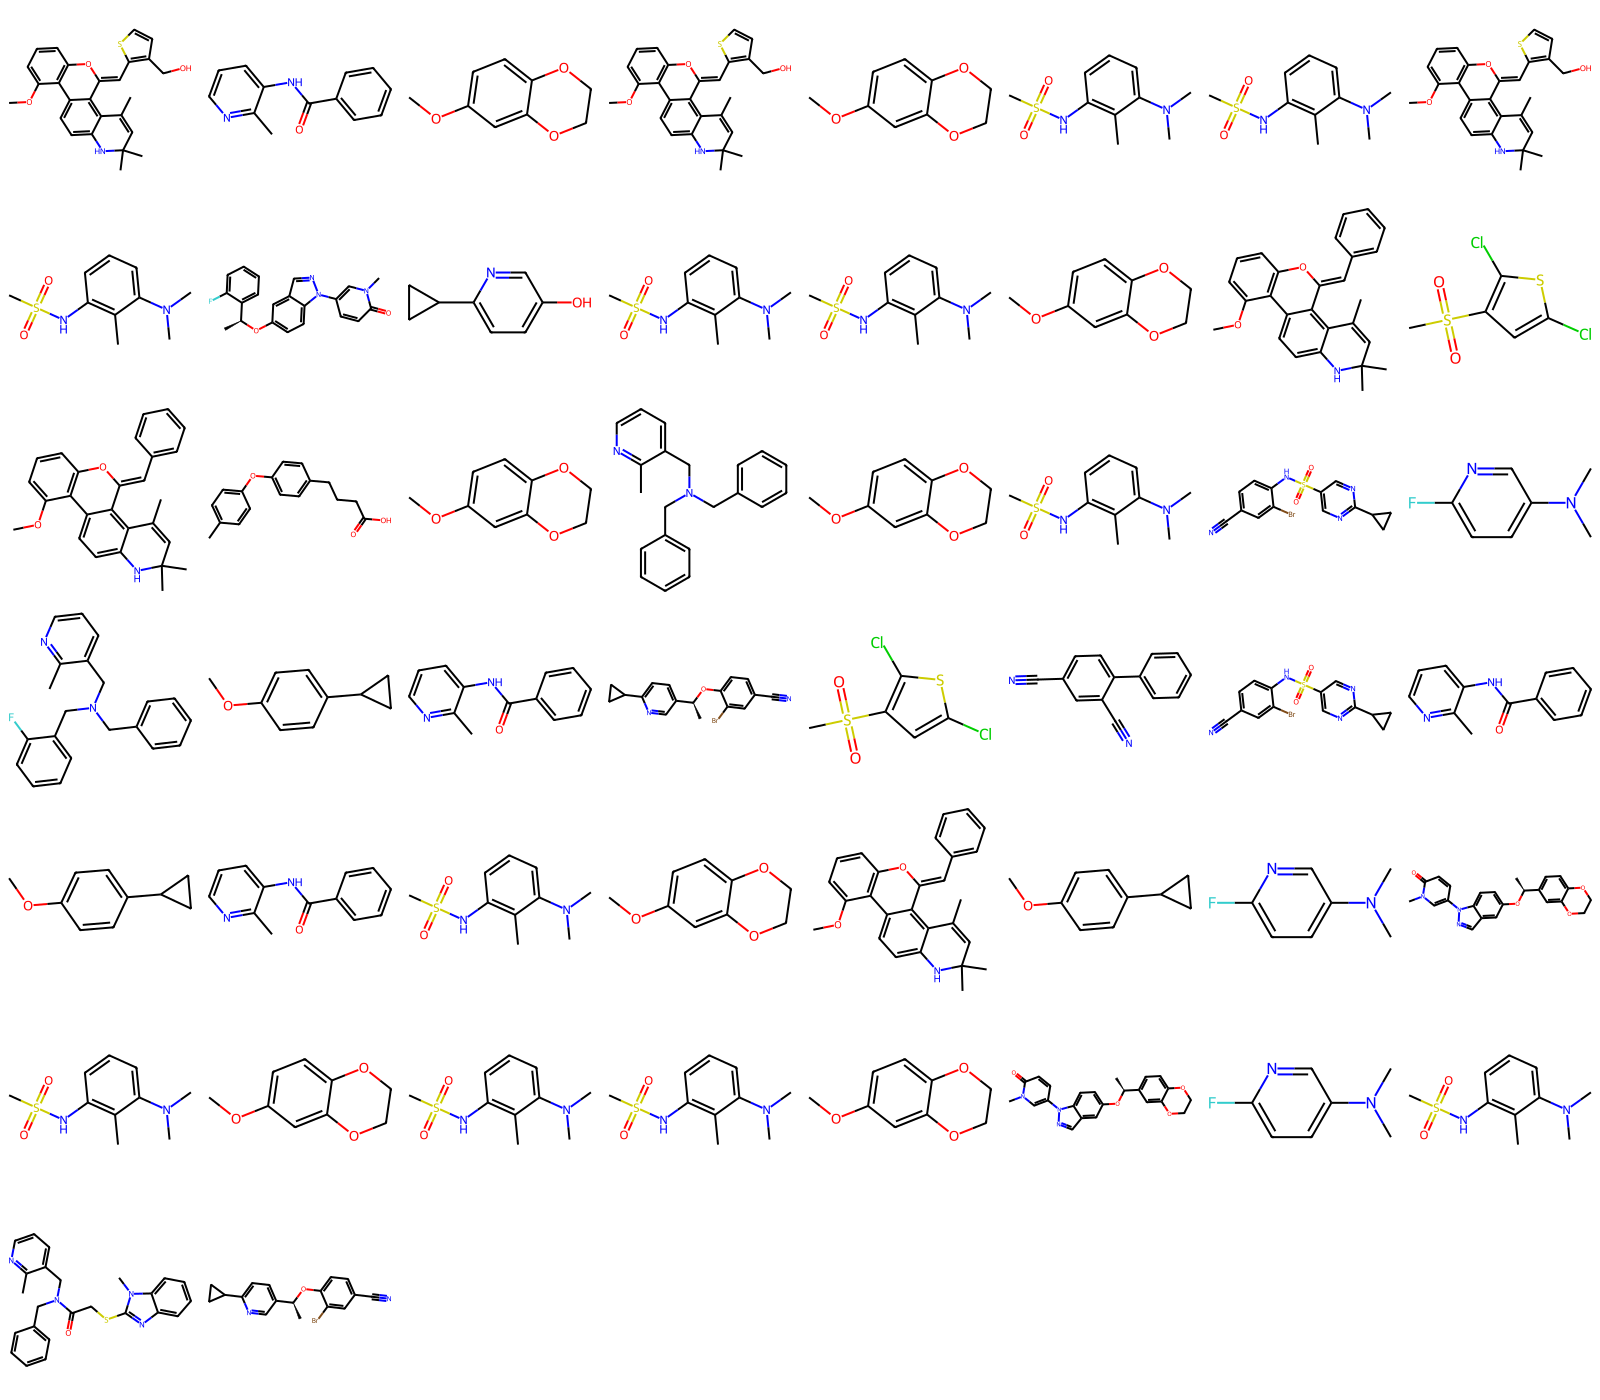

In [56]:
mg.generate_and_filter_mols(1000)
d = Draw.MolsToGridImage(mg.good_mols[:50],molsPerRow=8, subImgSize=(200,200))
display(d)

In [57]:
output = [Chem.MolToSmiles(x) for x in mg.good_mols]
output

['COc1cccc2c1-c1ccc3c(c1/C(=C/c1sccc1CO)O2)C(C)=CC(C)(C)N3',
 'Cc1ncccc1NC(=O)c1ccccc1',
 'COc1ccc2c(c1)OCCO2',
 'COc1cccc2c1-c1ccc3c(c1/C(=C/c1sccc1CO)O2)C(C)=CC(C)(C)N3',
 'COc1ccc2c(c1)OCCO2',
 'Cc1c(NS(C)(=O)=O)cccc1N(C)C',
 'Cc1c(NS(C)(=O)=O)cccc1N(C)C',
 'COc1cccc2c1-c1ccc3c(c1/C(=C/c1sccc1CO)O2)C(C)=CC(C)(C)N3',
 'Cc1c(NS(C)(=O)=O)cccc1N(C)C',
 'C[C@H](Oc1ccc2c(cnn2-c2ccc(=O)n(C)c2)c1)c1ccccc1F',
 'Oc1ccc(C2CC2)nc1',
 'Cc1c(NS(C)(=O)=O)cccc1N(C)C',
 'Cc1c(NS(C)(=O)=O)cccc1N(C)C',
 'COc1ccc2c(c1)OCCO2',
 'COc1cccc2c1-c1ccc3c(c1/C(=C/c1ccccc1)O2)C(C)=CC(C)(C)N3',
 'CS(=O)(=O)c1cc(Cl)sc1Cl',
 'COc1cccc2c1-c1ccc3c(c1/C(=C/c1ccccc1)O2)C(C)=CC(C)(C)N3',
 'Cc1ccc(Oc2ccc(CCCC(=O)O)cc2)cc1',
 'COc1ccc2c(c1)OCCO2',
 'Cc1ncccc1CN(Cc1ccccc1)Cc1ccccc1',
 'COc1ccc2c(c1)OCCO2',
 'Cc1c(NS(C)(=O)=O)cccc1N(C)C',
 'N#Cc1ccc(NS(=O)(=O)c2cnc(C3CC3)nc2)c(Br)c1',
 'CN(C)c1ccc(F)nc1',
 'Cc1ncccc1CN(Cc1ccccc1)Cc1ccccc1F',
 'COc1ccc(C2CC2)cc1',
 'Cc1ncccc1NC(=O)c1ccccc1',
 'C[C@H](Oc1ccc(C#N)cc1Br)c1ccc(

In [58]:

dfff = pd.DataFrame(data = output)

In [60]:
dfff.to_csv("../data/input_data/wim_gen_4.csv", index = False, header = False)

In [2]:
import pandas as pd
for y in ['dis','sim']:
    for x in range(5):
        var = y
        mg = markovgen.Generator(max_n=10000,depth=7,verbose=True,mode="groupselfies")
        #mg.load('data/chembl100K.csv.xz') #can be a regular csv too
        
        mg.load(f'../data/input_data/input_gener_glucocor_{var}_{x}.csv')
        mg.populate_matrix()
        mg.save_state("data/weights_chembl10K_groupselfies_depth7.pkl.xz")
        mg.generate_and_filter_mols(10000)
        output = [Chem.MolToSmiles(x) for x in mg.good_mols]
        dfff = pd.DataFrame(data = output)
        dfff.to_csv(f"../data/input_data/wim_gen_{var}_{x}.csv", index = False, header = False)

amount of strings parsed is: 29438
efficiency is 0.3396969902846661
duplicate rate of filt compounds is 0.0
rate of uniques is 0.0379
generation took 169.18 s, thats 0.44639448503076556 sec per unique molecule after filtering
total amount of trys was 29438. this means a validity of 100.0 %
amount of strings parsed is: 33688
efficiency is 0.29684160531940157
duplicate rate of filt compounds is 0.0
rate of uniques is 0.0344
generation took 189.46 s, thats 0.5507643472316653 sec per unique molecule after filtering
total amount of trys was 33688. this means a validity of 100.0 %
amount of strings parsed is: 27747
efficiency is 0.3603993224492738
duplicate rate of filt compounds is 0.0
rate of uniques is 0.038
generation took 158.13 s, thats 0.41612127140948646 sec per unique molecule after filtering
total amount of trys was 27747. this means a validity of 100.0 %
amount of strings parsed is: 33851
efficiency is 0.2954122477917934
duplicate rate of filt compounds is 0.0
rate of uniques is 0